# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

df_artificial_linear = pd.read_csv('./csv/artificial-linear-dataset.csv')

X = df_artificial_linear[['x', 'y']]
y = df_artificial_linear['class']

log_reg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear regression accuraccy:  1.0
classification report linear regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



<Axes: >

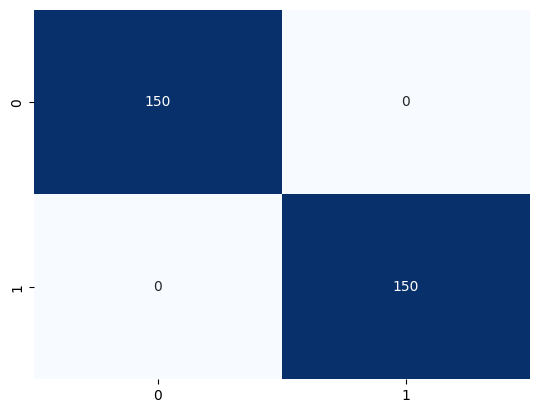

In [2]:
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

print("linear regression accuraccy: ", log_reg.score(X_test, y_test))
print("classification report linear regression\n", classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)

svm accuraccy:  1.0
classification_report svm
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



<Axes: >

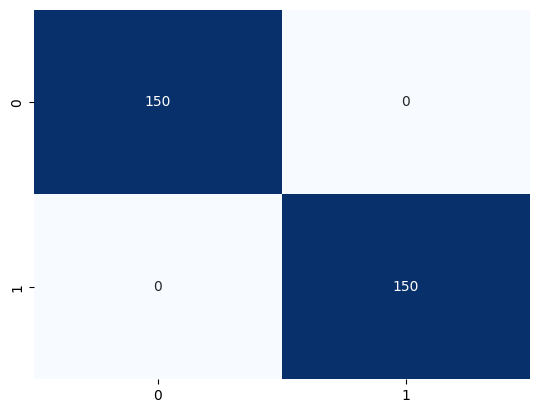

In [3]:
svm = SVC(kernel='linear')  
svm.fit(X_train, y_train)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
y_pred = svm.predict(X_test)

print("svm accuraccy: ", svm.score(X_test, y_test))
print("classification_report svm\n", classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)


classification_report random forest
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



<Axes: >

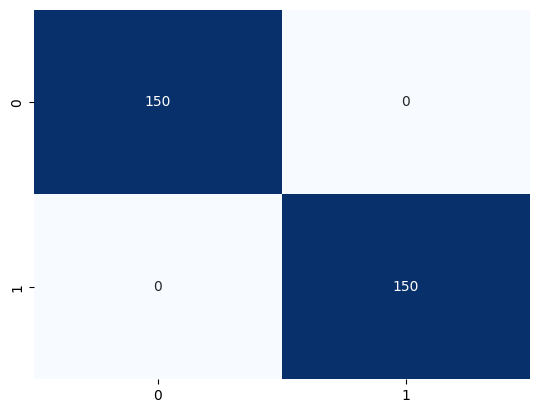

In [4]:
X_np = X.to_numpy()
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X, y)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

y_pred = rf.predict(X_test)

print("classification_report random forest\n", classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)


c:\Users\Микола\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Микола\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Микола\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


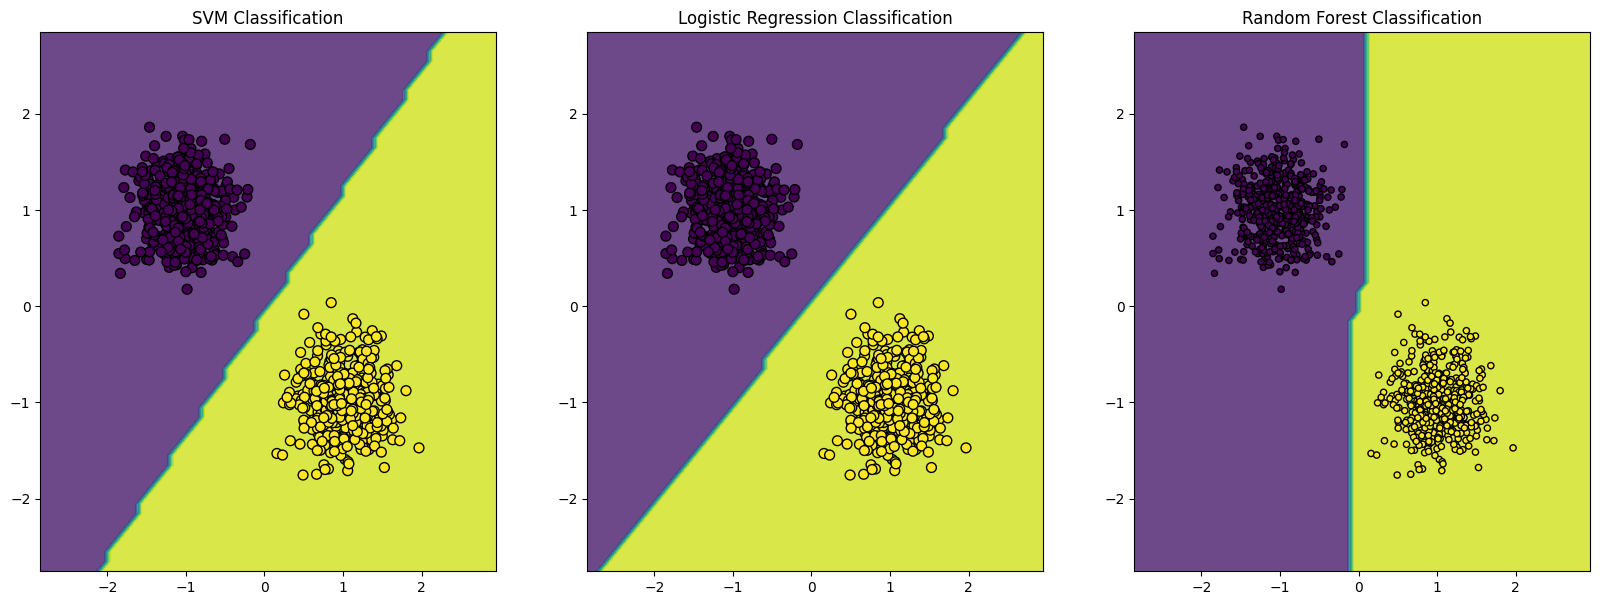

In [5]:

svm = SVC(kernel='linear', C=1)
svm.fit(X, y)

log_reg = LogisticRegression()
log_reg.fit(X, y)

x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[0].contourf(xx, yy, Z, alpha=0.8)
ax[0].scatter(X_np[:, 0], X_np[:, 1], c=y, s=50, edgecolors='k')
ax[0].set_title('SVM Classification')

Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[1].contourf(xx, yy, Z, alpha=0.8)
ax[1].scatter(X_np[:, 0], X_np[:, 1], c=y, s=50, edgecolors='k')
ax[1].set_title('Logistic Regression Classification')

Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[2].contourf(xx, yy, Z, alpha=0.8)
ax[2].scatter(X_np[:, 0], X_np[:, 1], c=y, s=20, edgecolor='k')
ax[2].set_title('Random Forest Classification')

plt.show()

**Аналіз отриманих результатів**:

1. Усі 3 моделі видали однакові результати, тобто їхня точність дорівнює 1, скоріш за все, це пов'язано із тим що ці дані лінійно розподільні і розпізнати їх було легко
2. Графіки досить схожі, але тим не менше відмінності є, найкраще як на мене графік у логістиної регресії та SVM. Random Forest правильно усе розподілив, але межа не така гладка, як у попередніх двох графіках
3. Якщо вибирати одну модель, найкращою буде скоріш за все, логістична регресія через те, що вона споживатиме найменше ресурсів серед усіх вищевказаних моделей і вона добре підходить для лінійно роздільних даних, як у цій ситуації



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [6]:
df_overlapping_objects = pd.read_csv('./csv/overlapping_classes_data.csv')

X = df_overlapping_objects[['x', 'y']]
y = df_overlapping_objects['class']
X_np = X.to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classification_report svm
               precision    recall  f1-score   support

           1       0.91      0.89      0.90       168
           2       0.94      0.95      0.95       155
           3       0.86      0.88      0.87       157

    accuracy                           0.91       480
   macro avg       0.91      0.91      0.91       480
weighted avg       0.91      0.91      0.91       480



<Axes: >

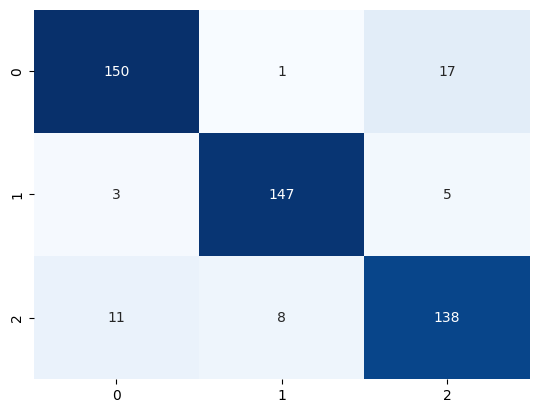

In [7]:
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict(X_test)

print("classification_report svm\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)


classification_report random forest
               precision    recall  f1-score   support

           1       0.94      0.90      0.92       168
           2       0.95      0.95      0.95       155
           3       0.86      0.90      0.88       157

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480



<Axes: >

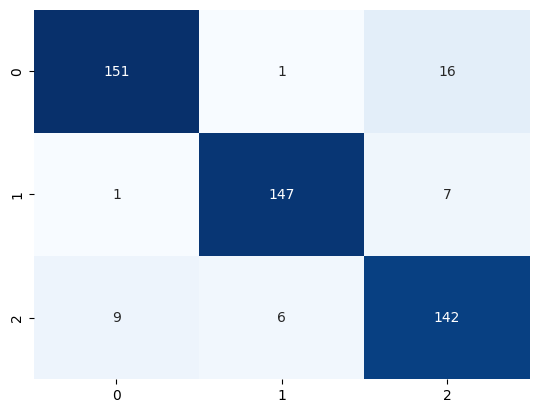

In [8]:
rf = RandomForestClassifier(n_estimators=2400, random_state=42, max_depth=5)
rf.fit(X, y)

y_pred = rf.predict(X_test)

print("classification_report random forest\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)

classification_report mlp classifier
               precision    recall  f1-score   support

           1       0.92      0.88      0.90       168
           2       0.94      0.94      0.94       155
           3       0.85      0.89      0.87       157

    accuracy                           0.90       480
   macro avg       0.90      0.90      0.90       480
weighted avg       0.90      0.90      0.90       480



<Axes: >

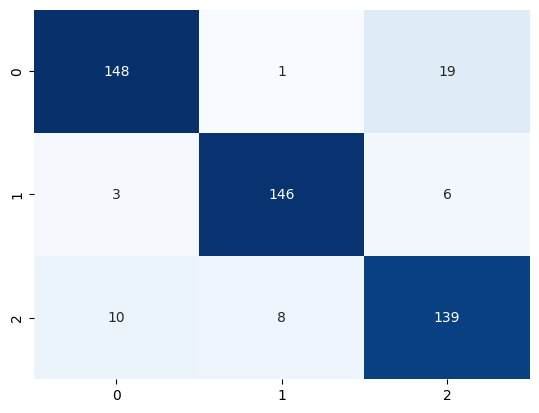

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print("classification_report mlp classifier\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)

c:\Users\Микола\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Микола\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Микола\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\Микола\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\Микола\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted wi

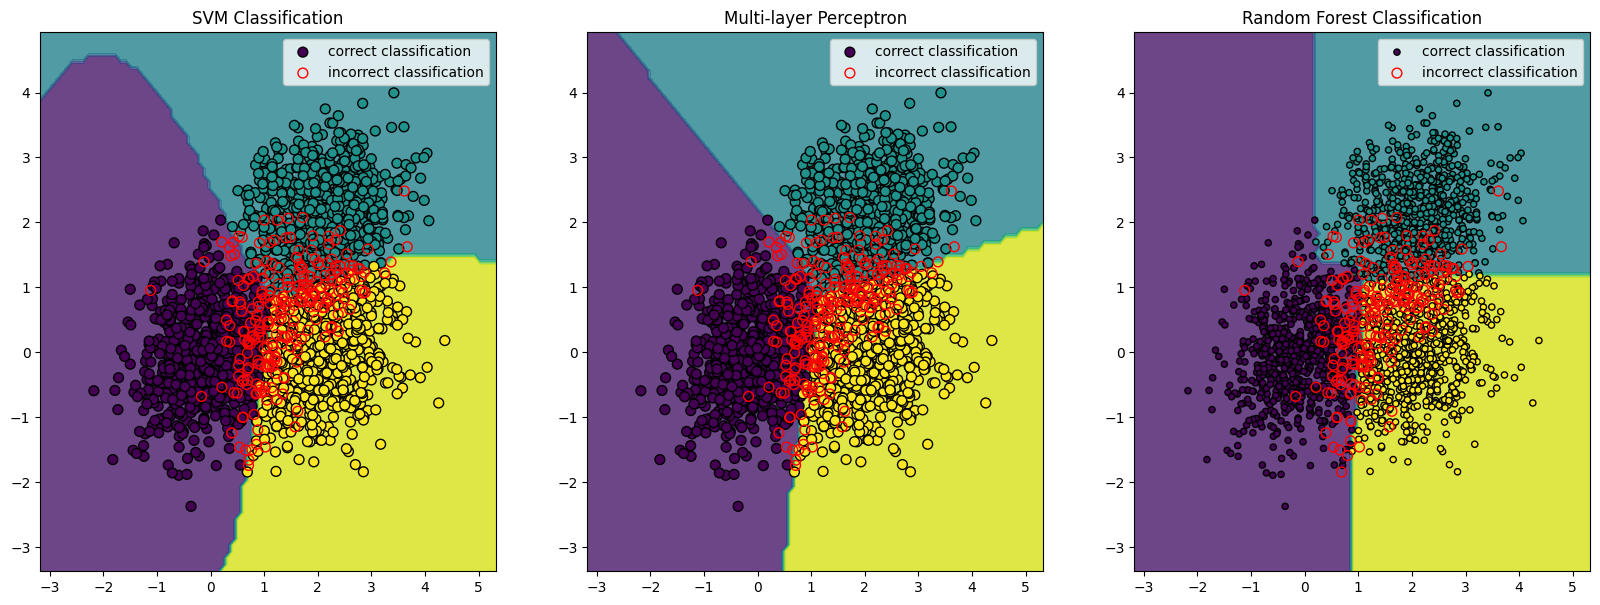

In [10]:
x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[0].contourf(xx, yy, Z, alpha=0.8)

y_pred_svm = svm_rbf.predict(X_np)
misclassified = y_pred_svm != y

ax[0].scatter(X_np[~misclassified, 0], X_np[~misclassified, 1],
              c=y[~misclassified], s=50, edgecolors='k', label='correct classification')

ax[0].scatter(X_np[misclassified, 0], X_np[misclassified, 1],
              facecolors='none', edgecolors='r', s=50, marker='o', label='incorrect classification')

ax[0].set_title('SVM Classification')
ax[0].legend()

Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[1].contourf(xx, yy, Z, alpha=0.8)

y_pred_mlp = mlp.predict(X_np)
misclassified = y_pred_mlp != y

ax[1].scatter(X_np[~misclassified, 0], X_np[~misclassified, 1],
              c=y[~misclassified], s=50, edgecolors='k', label='correct classification')
ax[1].scatter(X_np[misclassified, 0], X_np[misclassified, 1],
              facecolors='none', edgecolors='r', s=50, marker='o', label='incorrect classification')
ax[1].set_title('Multi-layer Perceptron')
ax[1].legend()

Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[2].contourf(xx, yy, Z, alpha=0.8)

y_pred_rf = rf.predict(X_np)
misclassified = y_pred_rf != y

ax[2].scatter(X_np[~misclassified, 0], X_np[~misclassified, 1],
              c=y[~misclassified], s=20, edgecolors='k', label='correct classification')
ax[2].scatter(X_np[misclassified, 0], X_np[misclassified, 1],
              facecolors='none', edgecolors='r', s=50, marker='o', label='incorrect classification')
ax[2].set_title('Random Forest Classification')
ax[2].legend()

plt.show()


**Аналіз отриманих результатів**:

Для цього завдання я обрав такі три моделі: це SVM, логістична багатошаровий персептрон та random forest. Якщо брати по результатам, то найкраще справився random forest з точністю 1(якщо не робити обмеження щодо максимальної глибини, якщо ситуація така як на малюнку то точність складає 0.92), а SVM - 0.91, MLP - 0.9. Загалом у останніх двох результати дуже схожі, щодо впливу на продуктивність моделей через перетин класів, то це досить сильно впливає через те, що об'єкти розташовані дуже близько і вони накладаються один на одний відповідно класифікувати їх без помилок стає дуже тяжко, але якщо вибрати підходящі моделі, то точність може доходити навіть до 1, хоча це лише якщо говорити про random forest він показав найкращий результат оскільки з самого початку він налаштований для того щоб працювати із нелінійною класифікацією і навіть ті помилки, які робили окремі дерева ріщень, які застосовувалиися у самому random forest вони компенсувалися через те, що клас обирався за найбільшою кількістю інших дерев які також вибрали цей клас.

Крім цього, варто зауважити, що аналізував я кількість даних не 1000, оскільки у такому разі точність моделей була на рівні точності підкинутої монетки +- 0.59, що є не дуже хорошим результатом через це я вирішив збільшити кількість даних до 2400 і це допомогло, оскільки всі моделі показали рівент більше рівне 90%



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

classification_report svm
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       150
         1.0       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



<Axes: >

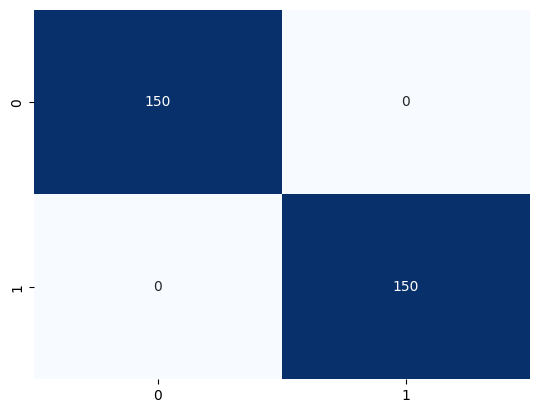

In [11]:
df_torus = pd.read_csv('./csv/torus_data.csv')

X = df_torus[['x', 'y']].values  
y = df_torus['class'].values
X_np = df_torus[['x', 'y']].to_numpy()

y = y - 1  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict(X_test)

print("classification_report svm\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)

classification_report random forest
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



<Axes: >

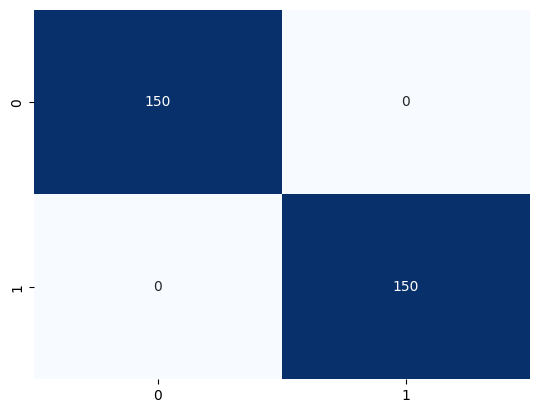

In [12]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=5)
rf.fit(X, y)

y_pred = rf.predict(X_test)

y_test_int = y_test.astype(int)
y_pred_int = y_pred.astype(int)

print("classification_report random forest\n", classification_report(y_test_int, y_pred_int))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

num_classes = len(set(y))  

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(2,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"test accuracy: {test_acc}")

y_test_int = y_test.astype(int)
y_pred_int = y_pred.astype(int)


c:\Users\Микола\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4552 - loss: 0.6637 - val_accuracy: 0.5000 - val_loss: 0.6216
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4873 - loss: 0.5973 - val_accuracy: 0.5667 - val_loss: 0.5612
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6392 - loss: 0.5317 - val_accuracy: 0.8033 - val_loss: 0.4914
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8750 - loss: 0.4647 - val_accuracy: 0.9433 - val_loss: 0.3992
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9907 - loss: 0.3525 - val_accuracy: 0.9967 - val_loss: 0.2882
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.2556 - val_accuracy: 1.0000 - val_loss: 0.1919
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1690 - val_accuracy: 1.0000 - val_loss: 0.1174
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1007 - val_accuracy: 1.0000 - val_loss

1786/1786 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


Text(0.5, 1.0, 'Tensorflow, CNN')

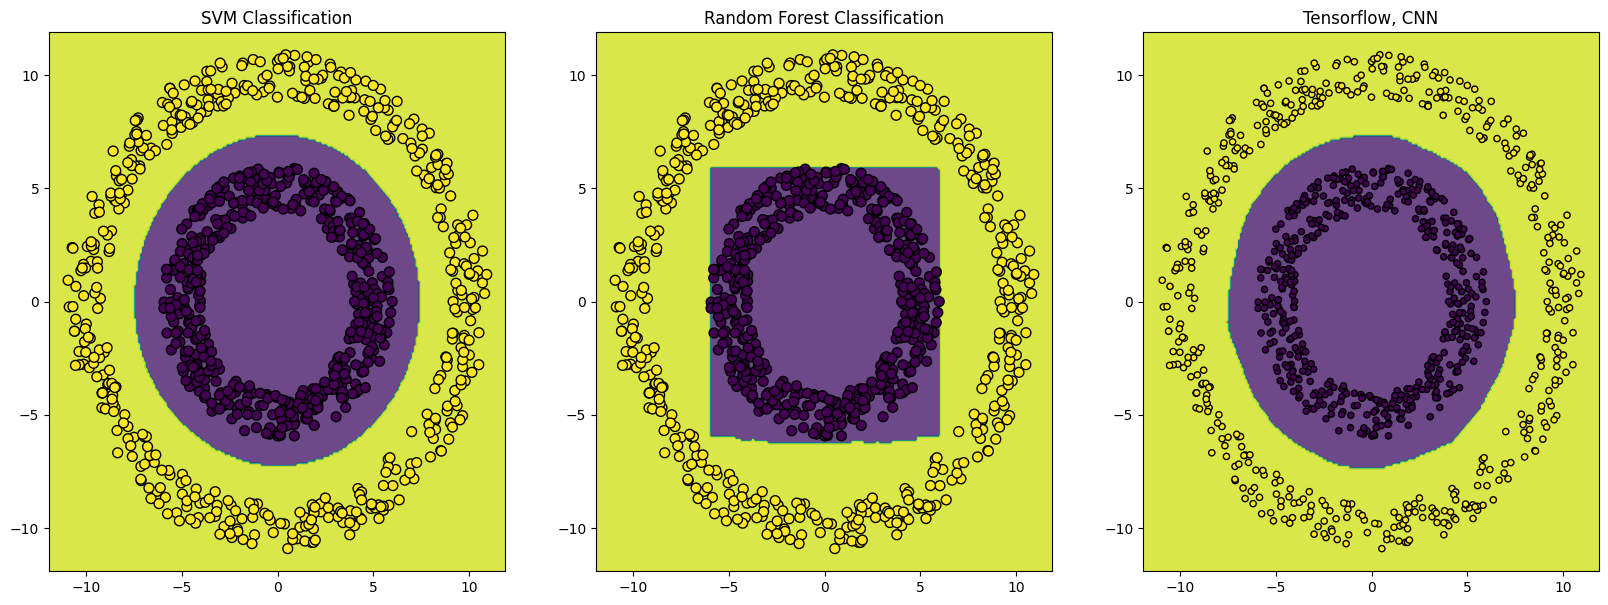

In [14]:
x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[0].contourf(xx, yy, Z, alpha=0.8)
ax[0].scatter(X_np[:, 0], X_np[:, 1], c=y, s=50, edgecolors='k')
ax[0].set_title('SVM Classification')

Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[1].contourf(xx, yy, Z, alpha=0.8)
ax[1].scatter(X_np[:, 0], X_np[:, 1], c=y, s=50, edgecolors='k')
ax[1].set_title('Random Forest Classification')

grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid)
Z = model.predict(grid_scaled)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
ax[2].contourf(xx, yy, Z, alpha=0.8)
ax[2].scatter(X_np[:, 0], X_np[:, 1], c=y, s=20, edgecolor='k')
ax[2].set_title('Tensorflow, CNN')

**Аналіз отриманих результатів**:

1.   Усі представлені нейронні мережі показали тут велику точність
2.   Це пов'язано з тим що дані досить добре розділені і знайти межу не було складно наприклад SVM добре працює із роздільними даними не тільки лінійноо розділеним якщо вказати інше ядро щодо random forest то тут майже квадратна межа також допомогло відділити менше коло від більшого, а tensorflow можливо був overkill для цієї задачі, але також видно, що він добре справився він добре підходить для зображень 
3.   Tendorflow робив багато ітерацій хоча точгність 1 уже була на 6 ітерації, щодо random forest йому вистачило глибини 5 щоб отримати точність 1

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

classification_report mlp classifier
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       302
           1       0.92      0.91      0.91       298

    accuracy                           0.92       600
   macro avg       0.92      0.91      0.91       600
weighted avg       0.92      0.92      0.91       600



c:\Users\Микола\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


<Axes: >

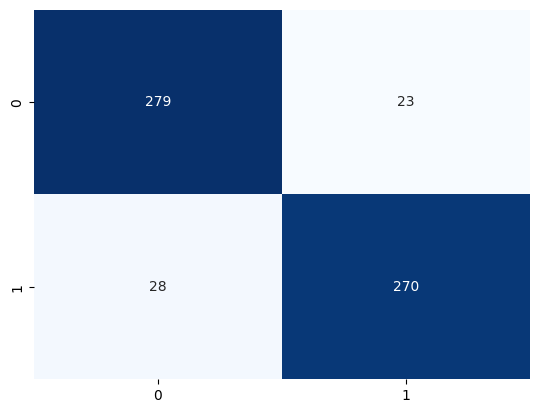

In [15]:
df_spiral = pd.read_csv('./csv/data_spiral.csv')

X = df_spiral[['x', 'y']].values  
y = df_spiral['class'].values
X_np = df_spiral[['x', 'y']].to_numpy()

y = y - 1  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print("classification_report mlp classifier\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)

classification_report random forest
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       1.00      1.00      1.00       298

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



<Axes: >

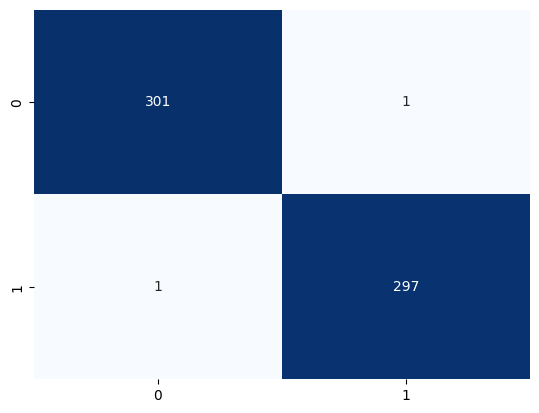

In [16]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=5)
rf.fit(X, y)

y_pred = rf.predict(X_test)

y_test_int = y_test.astype(int)
y_pred_int = y_pred.astype(int)

print("classification_report random forest\n", classification_report(y_test_int, y_pred_int))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)

classification_report svm
               precision    recall  f1-score   support

           0       0.72      0.67      0.70       302
           1       0.69      0.74      0.71       298

    accuracy                           0.70       600
   macro avg       0.71      0.71      0.70       600
weighted avg       0.71      0.70      0.70       600



<Axes: >

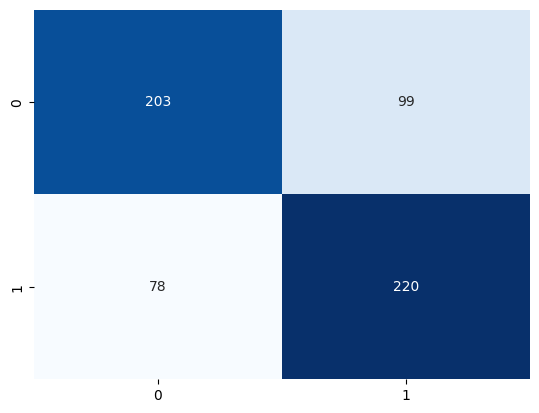

In [17]:
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict(X_test)

print("classification_report svm\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


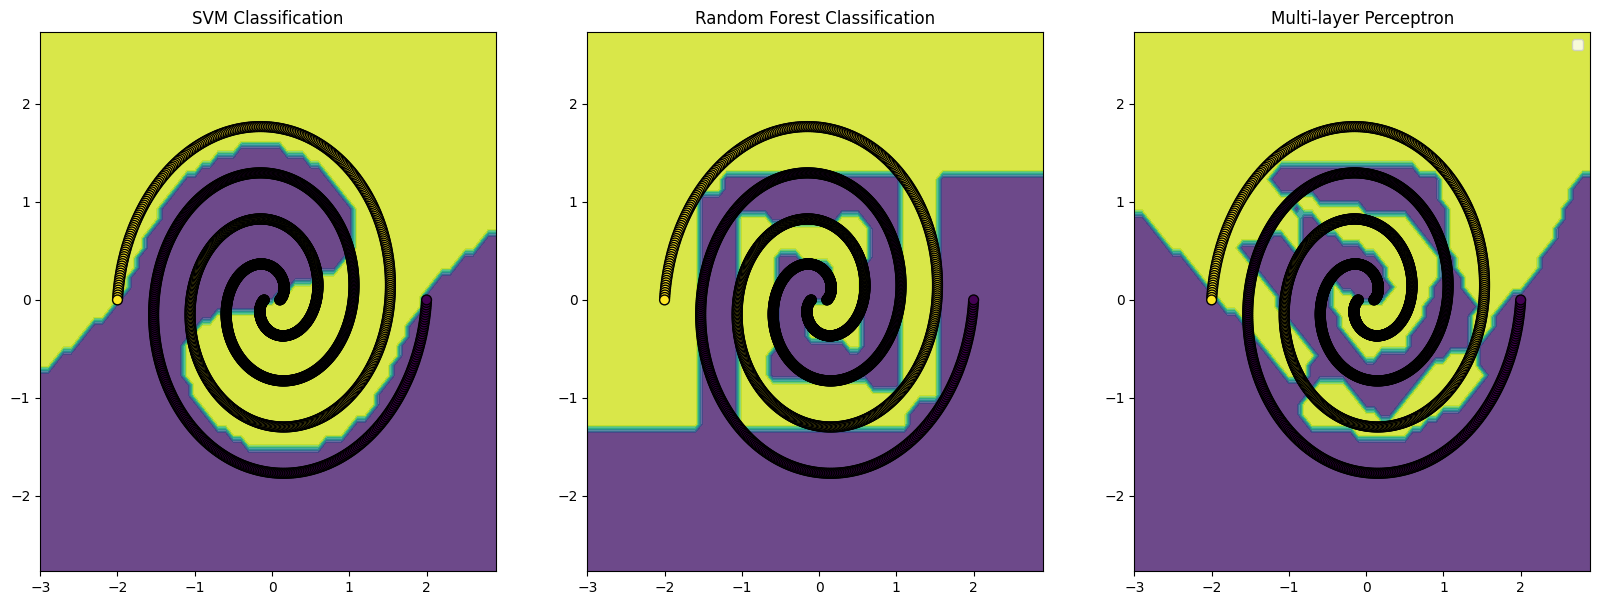

In [18]:
x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[0].contourf(xx, yy, Z, alpha=0.8)
ax[0].scatter(X_np[:, 0], X_np[:, 1], c=y, s=50, edgecolors='k')
ax[0].set_title('SVM Classification')

Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[1].contourf(xx, yy, Z, alpha=0.8)
ax[1].scatter(X_np[:, 0], X_np[:, 1], c=y, s=50, edgecolors='k')
ax[1].set_title('Random Forest Classification')

Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[2].contourf(xx, yy, Z, alpha=0.8)
y_pred_mlp = mlp.predict(X_np)
ax[2].scatter(X_np[:, 0], X_np[:, 1], c=y, s=50, edgecolors='k')
ax[2].set_title('Multi-layer Perceptron')
ax[2].legend()

**Аналіз отриманих результатів**:

1.   Найкраще справився random forest із точністю 1 потім іде MLP із точністю 0.91 а потім SVM із тоністю 0.71. 
2.   Гадаю, що SVM має таку точність оскільки архітектура самих даних досить складна Щодо інших нейронних мереж, то вони впоралися добре, оскільки із самого початку налаштовані щоб працювати із нелінійними даними